# 1. Scikit-Learn 

In [21]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

In [22]:
iris_sl = load_iris()

In [23]:
iris_data = pd.DataFrame(data=iris_sl.data, columns=iris_sl.feature_names)
iris = pd.DataFrame(data=iris_sl.data, columns=iris_sl.feature_names)
iris_data.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [24]:
iris_target = pd.DataFrame(data=iris_sl.target, columns=['target'])
iris_target.columns

Index(['target'], dtype='object')

In [25]:
iris_data.head(); iris_data.shape

(150, 4)

In [26]:
iris_target.head(); iris_target.shape

(150, 1)

In [27]:
logreg = LogisticRegression()

In [32]:
X = iris_sl.data[:, :2]  # we only take the first two features.
Y = iris_sl.target

In [33]:
logreg.fit(X, Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

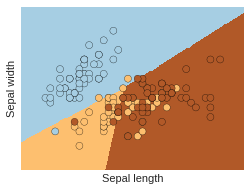

In [35]:
h = .02
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()